In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_master = pd.read_pickle('GTD_df.p')

## Start with a simple model

In [4]:
row_mask = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features = ['iyear', 
            'imonth', 
            'multiple',
            'success',
            'suicide',
            'nkill',
            'nkillus',
            'nkillter',
            'nwound',
            'nwoundus',
            'nwoundte',
            'ishostkid',
            'property']
            
# Consider adding nperps and nperpcap but lots of nan values
# Features below need to be trasnformed into dummy matrix 
features_cat = ['country_txt', 
                'attacktype1_txt',
                'weaptype1_txt',
                'targtype1_txt',
                'natlty1_txt']

labels = ['gname']

In [5]:
df_master[labels + features + features_cat][row_mask].shape

(10382, 19)

In [6]:
df_master[labels + features + features_cat][row_mask].dropna().shape

(9139, 19)

In [7]:
df_m1 = pd.get_dummies(df_master[labels + features + features_cat][row_mask].dropna(), columns=features_cat)
df_m1 = df_m1[df_m1.groupby('gname')['gname'].transform(len) > 5]

In [8]:
df_m1.shape

(8556, 234)

In [9]:
X = df_m1.iloc[:,1:]
y = df_m1.iloc[:,0]

In [10]:
len(y.unique())

116

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [13]:
cm1 = RandomForestClassifier(n_estimators=25)
cm1.fit(X_train, y_train)
print('Train Accuracy:', cm1.score(X_train, y_train))
print('Test Accuracy:', cm1.score(X_test, y_test))
print(classification_report(y_test, cm1.predict(X_test)))

Train Accuracy: 0.995324918186
Test Accuracy: 0.804114071996
                                                              precision    recall  f1-score   support

                                     Abdullah Azzam Brigades       0.00      0.00      0.00         2
                                      Abu Sayyaf Group (ASG)       0.29      0.18      0.22        11
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00         2
                                                  Ajnad Misr       0.00      0.00      0.00         3
                                     Al-Aqsa Martyrs Brigade       0.70      0.54      0.61        13
                                                    Al-Fatah       0.50      1.00      0.67         1
                                       Al-Naqshabandiya Army       1.00      0.20      0.33         5
                                             Al-Nusrah Front       0.83      0.68      0.75        22
                    

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [14]:
pd.DataFrame(cm1.feature_importances_, X.columns, columns=['Coefs']).sort_values(by='Coefs', ascending = False)

,Coefs
country_txt_Afghanistan,0.092946
iyear,0.088417
natlty1_txt_Afghanistan,0.084078
imonth,0.064446
nkill,0.044474
nwound,0.040642
natlty1_txt_Iraq,0.036955
country_txt_Iraq,0.034804
natlty1_txt_Somalia,0.028198
natlty1_txt_Nigeria,0.022398


In [15]:
pd.DataFrame(y_test[cm1.predict(X_test)=='Al-Fatah'])

,gname
76568,Al-Qaida in the Arabian Peninsula (AQAP)
83392,Al-Fatah


In [16]:
## Master Pipeline
row_mask2 = (#(df_master['region_txt'] == 'Middle East & North Africa') &
            (df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features2 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             #'nwoundus',
             'nwoundte',
             'ishostkid',
             'property',
             'nperps',
             'nperpcap']
            

# Features below need to be trasnformed into dummy matrix 
features_cat2 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 #'weapsubtype1_txt',
                 'targtype1_txt',
                 #'targsubtype1_txt',
                 'natlty1_txt']

labels2 = ['gname']

#subset on mask and features
df_m2 = pd.get_dummies(df_master[labels2 + features2 + features_cat2][row_mask2].dropna(), columns=features_cat2)
#subset number of attack per group
df_m2 = df_m2[df_m2.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X2 = df_m2.iloc[:,1:]
y2 = df_m2.iloc[:,0]

#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.25, random_state=42)

#fit Model
cm2 = RandomForestClassifier(n_estimators=100)
cm2.fit(X2_train, y2_train)

#report
print('Number of Attacks:', df_m2.shape[0])
print('Number of Features:', df_m2.shape[1])
print('Number of Groups:', len(y2.unique()))
print('Train Accuracy:', cm2.score(X2_train, y2_train))
print('Test Accuracy:', cm2.score(X2_test, y2_test))
print(classification_report(y2_test, cm2.predict(X2_test)))

Number of Attacks: 8174
Number of Features: 4112
Number of Groups: 106
Train Accuracy: 1.0
Test Accuracy: 0.827788649706
                                                            precision    recall  f1-score   support

                                   Abdullah Azzam Brigades       1.00      0.67      0.80         3
                                    Abu Sayyaf Group (ASG)       0.00      0.00      0.00         8
                  Adan-Abyan Province of the Islamic State       0.00      0.00      0.00         2
                                                Ajnad Misr       0.00      0.00      0.00         2
                                   Al-Aqsa Martyrs Brigade       0.33      0.20      0.25        10
                                     Al-Naqshabandiya Army       0.00      0.00      0.00         3
                                           Al-Nusrah Front       0.80      0.47      0.59        17
                                          Al-Qaida in Iraq       0.96      0.8

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
pd.DataFrame(cm2.feature_importances_, X2.columns, columns=['Coefs']).sort_values(by='Coefs', ascending = False)

,Coefs
country_txt_Afghanistan,0.075731
natlty1_txt_Afghanistan,0.061289
iyear,0.046164
country_txt_Iraq,0.035115
iday,0.032650
imonth,0.031345
natlty1_txt_Iraq,0.026652
nkill,0.026426
nwound,0.025815
natlty1_txt_Nigeria,0.020415


In [18]:
test_group = 'Algerian Islamic Extremists'
pd.DataFrame(cm2.predict(X2_test)[y2_test == test_group][0], y2_test[y2_test == test_group], columns=['predictions'])

,predictions
gname,
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)
Algerian Islamic Extremists,Salafist Group for Preaching and Fighting (GSPC)


/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: 

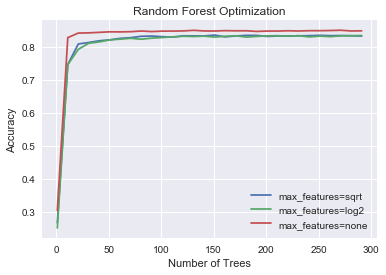

In [20]:
sqrt = []
log2 = []
none = []
n_range = range(1,300,10)

for n in n_range:
    cm_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', oob_score=True, n_jobs=-1)
    cm_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', oob_score=True, n_jobs=-1)
    cm_none = RandomForestClassifier(n_estimators=n, max_features=None, oob_score=True, n_jobs=-1)
    cm_sqrt.fit(X2, y2)
    cm_log2.fit(X2, y2)
    cm_none.fit(X2, y2)
    sqrt.append(cm_sqrt.oob_score_)
    log2.append(cm_log2.oob_score_)
    none.append(cm_none.oob_score_)

plt.plot(n_range, sqrt, label='max_features=sqrt')
plt.plot(n_range, log2, label='max_features=log2')
plt.plot(n_range, none, label='max_features=none')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

In [21]:
#optimizing the model
row_mask3 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features3 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property',]
            

# Features below need to be trasnformed into dummy matrix 
features_cat3 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels3 = ['gname']

#subset on mask and features
df_m3 = pd.get_dummies(df_master[labels3 + features3 + features_cat3][row_mask3].dropna(), columns=features_cat3)
#subset number of attack per group
df_m3 = df_m3[df_m3.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X3 = df_m3.iloc[:,1:]
y3 = df_m3.iloc[:,0]

#fit Model
cm3 = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score=True, n_jobs=-1, max_features=None,)
cm3.fit(X3, y3)

#report
print('Number of Attacks:', df_m3.shape[0])
print('Number of Features:', df_m3.shape[1])
print('Number of Groups:', len(y3.unique()))
print('Train Accuracy:', cm3.score(X3, y3))
print('OOB Accuracy:', cm3.oob_score_)

Number of Attacks: 8574
Number of Features: 4319
Number of Groups: 117
Train Accuracy: 0.999883368323
OOB Accuracy: 0.83799860042


/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: 

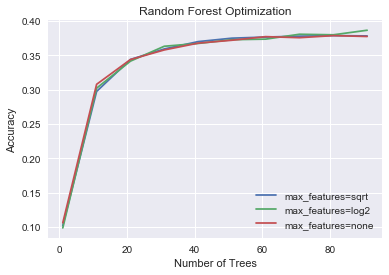

In [23]:
#let's take a look at what happens to accuracy when we drop categorcials
row_mask4 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features4 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

labels4 = ['gname']

#subset on mask and features
df_m4 = df_master[labels4 + features4][row_mask4].dropna()
#subset number of attack per group
df_m4 = df_m4[df_m4.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X4 = df_m4.iloc[:,1:]
y4 = df_m4.iloc[:,0]

#plot
sqrt = []
log2 = []
none = []
n_range = range(1,100,10)

for n in n_range:
    cm_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', oob_score=True, n_jobs=-1)
    cm_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', oob_score=True, n_jobs=-1)
    cm_none = RandomForestClassifier(n_estimators=n, max_features=None, oob_score=True, n_jobs=-1)
    cm_sqrt.fit(X4, y4)
    cm_log2.fit(X4, y4)
    cm_none.fit(X4, y4)
    sqrt.append(cm_sqrt.oob_score_)
    log2.append(cm_log2.oob_score_)
    none.append(cm_none.oob_score_)

plt.plot(n_range, sqrt, label='max_features=sqrt')
plt.plot(n_range, log2, label='max_features=log2')
plt.plot(n_range, none, label='max_features=none')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


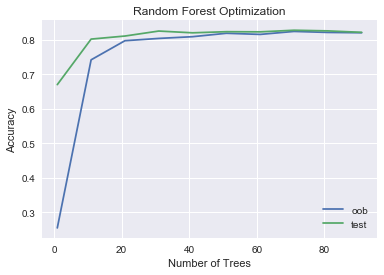

In [25]:
# Investigating OOB
#optimizing the model on what we've learned so far.
row_mask5 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features5 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat5 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels5 = ['gname']

#subset on mask and features
df_m5 = pd.get_dummies(df_master[labels5 + features5 + features_cat5][row_mask5].dropna(), columns=features_cat5)
#subset number of attack per group
df_m5 = df_m5[df_m5.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X5 = df_m5.iloc[:,1:]
y5 = df_m5.iloc[:,0]

#train test split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=.25, random_state=42)

#plot
oob = []
test = []
n_range = range(1,100,10)

for n in n_range:
    cm_test = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    cm_oob = RandomForestClassifier(n_estimators=n, oob_score=True, n_jobs=-1)
    cm_test.fit(X5_train, y5_train)
    cm_oob.fit(X5, y5)
    test.append(cm_test.score(X5_test, y5_test))
    oob.append(cm_oob.oob_score_)

plt.plot(n_range, oob, label='oob')
plt.plot(n_range, test, label='test')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

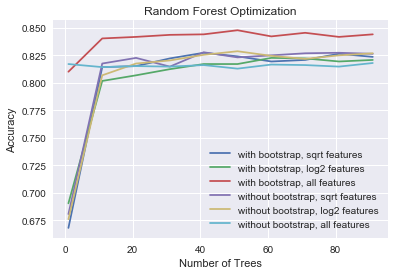

In [26]:
# Investigating bootstrapping
row_mask6 = (#(df_master['region_txt'] == 'Middle East & North Africa') &
            (df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features6 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat6 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels6 = ['gname']

#subset on mask and features
df_m6 = pd.get_dummies(df_master[labels6 + features6 + features_cat6][row_mask6].dropna(), columns=features_cat6)
#subset number of attack per group
df_m6 = df_m6[df_m6.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X6 = df_m6.iloc[:,1:]
y6 = df_m6.iloc[:,0]

#train test split
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=.25, random_state=42)

#plot
boot_sqrt = []
boot_log2 = []
boot_none = []
noboot_sqrt = []
noboot_log2 = []
noboot_none = []
n_range = range(1,100,10)

for n in n_range:
    cm_boot_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', n_jobs=-1, bootstrap=True)
    cm_boot_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', n_jobs=-1, bootstrap=True)
    cm_boot_none = RandomForestClassifier(n_estimators=n, max_features= None, n_jobs=-1, bootstrap=True)
    cm_noboot_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', n_jobs=-1, bootstrap=False)
    cm_noboot_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', n_jobs=-1, bootstrap=False)
    cm_noboot_none = RandomForestClassifier(n_estimators=n, max_features= None, n_jobs=-1, bootstrap=False)
    
    cm_boot_sqrt.fit(X6_train, y6_train)
    cm_boot_log2.fit(X6_train, y6_train)
    cm_boot_none.fit(X6_train, y6_train)
    cm_noboot_sqrt.fit(X6_train, y6_train)
    cm_noboot_log2.fit(X6_train, y6_train)
    cm_noboot_none.fit(X6_train, y6_train)
    
    boot_sqrt.append(cm_boot_sqrt.score(X6_test, y6_test))
    boot_log2.append(cm_boot_log2.score(X6_test, y6_test))
    boot_none.append(cm_boot_none.score(X6_test, y6_test))
    noboot_sqrt.append(cm_noboot_sqrt.score(X6_test, y6_test))
    noboot_log2.append(cm_noboot_log2.score(X6_test, y6_test))
    noboot_none.append(cm_noboot_none.score(X6_test, y6_test))

plt.plot(n_range, boot_sqrt, label='with bootstrap, sqrt features')
plt.plot(n_range, boot_log2, label='with bootstrap, log2 features')
plt.plot(n_range, boot_none, label='with bootstrap, all features')
plt.plot(n_range, noboot_sqrt, label='without bootstrap, sqrt features')
plt.plot(n_range, noboot_log2, label='without bootstrap, log2 features')
plt.plot(n_range, noboot_none, label='without bootstrap, all features')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

My random forest does not want to be a decision tree. Run cross val to mitigate variance in the all features model

In [ ]:
# trying Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

row_mask7 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features7 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat7 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels7 = ['gname']

#subset on mask and features
df_m7 = pd.get_dummies(df_master[labels7 + features7 + features_cat7][row_mask7].dropna(), columns=features_cat7)
#subset number of attack per group
df_m7 = df_m7[df_m7.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X7 = scale(df_m7.iloc[:,1:])
y7 = df_m7.iloc[:,0]

#train test split
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=.25, random_state=42)


# fit model and score
lr = LogisticRegression()
lr.fit(X7_train, y7_train)
print('Train:', lr.score(X7_train, y7_train))
print('Accuracy:', lr.score(X7_test, y7_test))

Train: 0.963608087092
Accuracy: 0.782649253731


This looks fairly overfit. Might need some regularization. Lets tune the C

In [ ]:
test=[]
train=[]
n_range = np.linspace(1e-6,1e+6, 100)

for n in n_range:
    lr = LogisticRegression(C=n)
    lr.fit(X7_train, y7_train)
    test.append(lr.score(X7_test, y7_test))
    train.append(lr.score(X7_train, y7_train))

plt.plot(n_range, test, label='test')
plt.plot(n_range, train, label='train')
plt.title('Logistic Regression Optimization')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend();

In [ ]:
# trying Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

row_mask8 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features8 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat8 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels8 = ['gname']

#subset on mask and features
df_m8 = pd.get_dummies(df_master[labels8 + features8 + features_cat8][row_mask8].dropna(), columns=features_cat8)
#subset number of attack per group
df_m8 = df_m8[df_m8.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X8 = df_m8.iloc[:,1:]
y8 = df_m8.iloc[:,0]

#train test split
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=.25, random_state=42)


# fit model and score
nb_B = BernoulliNB()
nb_M = MultinomialNB()
nb_G = GaussianNB()
nb_B.fit(X8_train, y8_train)
nb_M.fit(X8_train, y8_train)
nb_G.fit(X8_train, y8_train)
print('Bernoulli NB:', nb_B.score(X8_test, y8_test))
print('Multinomial NB:', nb_M.score(X8_test, y8_test))
print('Gaussian NB:', nb_G.score(X8_test, y8_test))

In [ ]:
-

In [ ]:
pd.DataFrame(cm9.feature_importances_, X9.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending = False)

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

#build parameter grid
n_estimators_range = list(range(10,100,10))
max_features_options = ['sqrt', 'log2', None]
min_samples_split_range = list(np.linspace(0.01,.1,5))
min_impurity_decrease_range = list(np.linspace(0.01,.1,5))

param_grid = dict(n_estimators = n_estimators_range,
                  max_features = max_features_options,
                  min_samples_split = min_samples_split_range, 
                  min_impurity_decrease = min_impurity_decrease_range)

#fit grid
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, scoring='accuracy', n_jobs=-1)
grid.fit(X9,y9)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
df_v = pd.DataFrame(
            {'gname': ['ISIL', 'Taliban', 'Misrata Militants', 'ISIL (suspected)', 'Al-Shabab (suspected)'],
             'iyear': [2017, 2017, 2017, 2017, 2017], 
             'imonth': [3, 4, 5, 11, 10],
             'iday': [11, 21, 20, 24, 14],
             'multiple': [1, 0, 0, 0, 0],
             'success': [1, 1, 1, 1, 1],
             'suicide': [1, 1, 0, 0, 1],
             'nkill': [114, 140, 141, 311, 512],
             'nkillus': [0, 0, 0, 0, 0],
             'nkillter': [4, 10, 0, 0, 1],
             'nwound': [150, 160, 100, 122, 316],
             'nwoundte': [0, 0, 0, 0, 0],
             'ishostkid': [0, 0, 0, 0, 0],
             'property': [1, 1, 1, 1, 1],
             'country_txt': ['Syria', 'Afghanistan', 'Libya', 'Egypt', 'Somalia'],
             'city': ['Damascus', 'Mazar-i-Sharif', 'Brak al-Shati', 'Al_Rawda', 'Mogadishu'],
             'attacktype1_txt': ['Bombing/Explosion', 'Armed Assault', 'Armed Assault', 'Armed Assault', 'Bombing/Explosion'],
             'weaptype1_txt': ['Explosives', 'Firearms', 'Firearms', 'Firearms', 'Explosives'],
             'targtype1_txt': ['Other', 'Military', 'Military', 'Religious Figures/Institutions', 'Private Citizens & Property'],
             'natlty1_txt': ['Iraq', 'Afghanistan', 'Libya', 'Egypt', 'Somalia']}, 
              columns=labels9 + features9 + features_cat9)
df_v = pd.get_dummies(df_v, columns=features_cat8)
df_v = pd.DataFrame(df_v, columns=df_m9.columns).fillna(0)

Xv = df_v.iloc[:,1:]
yv = df_v.iloc[:,0]

pd.DataFrame(np.transpose([yv,cm9.predict(Xv)]), columns=['Actual', 'Prediction'])

In [ ]:
pd.DataFrame(cm9.predict_proba(Xv),columns=cm9.classes_).T.sort_values(by=4,ascending=False)

In [ ]:
pd.DataFrame(cm8.feature_importances_, X9.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending = False)

In [ ]:
df_m9[df_m9['country_txt_Libya']==1]['gname'].value_counts()

In [ ]:
df_m9['gname'].value_counts()